# Engagement Curves

How many tasks students solve? How many days they return?

In [1]:
# Settings and imports.
%matplotlib inline
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates
import seaborn as sns
import data

sns.set()
sns.set_context('poster')
#sns.set_style('whitegrid')
pd.options.display.float_format = '{:.2f}'.format

# Preparing Data

In [2]:
ts = data.load('robomission-2018-03-10/task_sessions.csv')
# Only consider sessions with an interaction.
ts = ts[ts.time_spent > 0]
# Set maximum spent time to 1h.
ts.time_spent = ts.time_spent.clip_upper(60 * 60)
ts = ts.assign(date=ts.end.str[:10])
ts.head(2)

,student,task,solved,start,end,time_spent,date
id,,,,,,,
39,917,26,False,2017-11-13T10:58:19.666306Z,2017-11-13T10:59:21.969801Z,62,2017-11-13
28,584,41,True,2017-11-12T08:57:39.741460Z,2017-11-12T08:58:43.087657Z,63,2017-11-12


In [3]:
tasks = data.load('robomission-2018-03-10/tasks.csv')
levels = data.load('robomission-2018-03-10/levels.csv')

# Students - Tasks
How many students solved at least given number of tasks:

In [28]:
solved_ts = ts[ts.solved]
n_students = solved_ts.student.nunique()

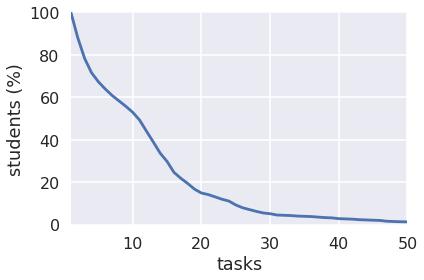

In [27]:
n_solved_ts = solved_ts.groupby('student').task.nunique()
solved_ts_count = n_solved_ts.groupby(n_solved_ts).count()
acc_count = solved_ts_count[::-1].cumsum()[::-1]
acc_perc = acc_count / n_students * 100
ax = acc_perc.plot()
ax.set_xlim(left=1, right=50)
ax.set_ylim(bottom=0, top=100)
ax.set_xlabel('tasks')
ax.set_ylabel('students (%)')
plt.tight_layout() #h_pad=1.0)
plt.savefig('../img/engagement-tasks.pdf')

# Students - Days
How many students solved a task this many distinct days:

In [17]:
days_count[days_count.index >= 2].sum()

102

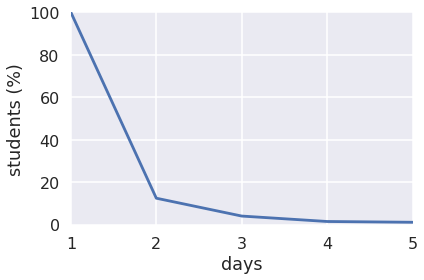

In [32]:
n_days = solved_ts.groupby('student').date.nunique()
days_count = n_days.groupby(n_days).count()
acc_count = days_count[::-1].cumsum()[::-1]
acc_perc = acc_count / n_students * 100
ax = acc_perc.plot()
ax.set_xlim(left=1, right=5)
ax.set_ylim(bottom=0, top=100)
ax.set_xlabel('days')
ax.set_ylabel('students (%)')
plt.tight_layout()
plt.savefig('../img/engagement-days.pdf')